In [1]:
import numpy as np # numpy library which provides objects for multi-dimensional arrays used to store values of same datatype..
                    #solve linear algebra
import pandas as pd # Pandas provides us with some powerful objects like DataFrames and Series 
                    # which are very useful for working with and analyzing data
from tensorflow import keras #This is a high-level API to build and train models that includes 
        # first-class support for TensorFlow-specific functionality, such as tf.data pipelines, 
                # and Estimators.
import tensorflow as tf
from PIL import Image as IMG #Python Imaging Library which provides the python interpreter with 
                             #image editing capabilities.
import os #To move through the folders and fetching the images
import matplotlib.pyplot as plt #To render Plots of our data
%matplotlib inline # it sets the backend of matplotlib to the 'inline' backend: With this backend,
# the output of plotting commands is displayed inline within frontends like the Jupyter notebook,
# directly below the code cell that produced it.
import sklearn.model_selection as smodel #To split the data for training and cross validation set

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
def countfile(root_dir):
    '''This function will move through all directory and 
    count the no. of images in our training set'''
    count = 0
    parent_folders = [os.path.join(root_dir,f) for f in os.listdir(root_dir)]
    for characterfolder in parent_folders:
        if(os.path.isdir(characterfolder)):
            characterimage = [os.path.join(characterfolder,f) for f in os.listdir(characterfolder)]
            for image in characterimage:
                count += 1
    return count

In [4]:
def make_matrix(root_dir):
    '''This will make our feature matrix and label matrix used to train our model
    '''
    size = countfile(root_dir)
    X = np.zeros((size,32,32))
    Y = np.zeros((size,1),dtype='S140')
    Id = 0
    parent_folders = [os.path.join(root_dir,f) for f in os.listdir(root_dir)]
    for characterfolder in parent_folders:
        if(characterfolder):
            print(characterfolder)
            characterimage = [os.path.join(characterfolder,f) for f in os.listdir(characterfolder)]
            for image in characterimage:
                I = np.array(IMG.open(image))#This will open the image and parse the data as it's pixel values
                X[Id] = I #Used to assign the pixel data for each image
                filepathTokens=image.split('/') 
                Y[Id,] = str(filepathTokens[-2].split('_')[-1])
                Id += 1
    return X,Y

In [5]:
rootdir = "C:/Users/Admin/Desktop/MNIST HINDI/DevanagariHandwrittenCharacterDataset/DevanagariHandwrittenCharacterDataset/Train"  #This is our directory inside which all images are present in different subfolders.
X,Y = make_matrix(rootdir)

C:/Users/Admin/Desktop/MNIST HINDI/DevanagariHandwrittenCharacterDataset/DevanagariHandwrittenCharacterDataset/Train\character_10_yna
C:/Users/Admin/Desktop/MNIST HINDI/DevanagariHandwrittenCharacterDataset/DevanagariHandwrittenCharacterDataset/Train\character_11_taamatar
C:/Users/Admin/Desktop/MNIST HINDI/DevanagariHandwrittenCharacterDataset/DevanagariHandwrittenCharacterDataset/Train\character_12_thaa
C:/Users/Admin/Desktop/MNIST HINDI/DevanagariHandwrittenCharacterDataset/DevanagariHandwrittenCharacterDataset/Train\character_13_daa
C:/Users/Admin/Desktop/MNIST HINDI/DevanagariHandwrittenCharacterDataset/DevanagariHandwrittenCharacterDataset/Train\character_14_dhaa
C:/Users/Admin/Desktop/MNIST HINDI/DevanagariHandwrittenCharacterDataset/DevanagariHandwrittenCharacterDataset/Train\character_15_adna
C:/Users/Admin/Desktop/MNIST HINDI/DevanagariHandwrittenCharacterDataset/DevanagariHandwrittenCharacterDataset/Train\character_16_tabala
C:/Users/Admin/Desktop/MNIST HINDI/DevanagariHandwr

In [6]:
Yclass = {}
for i in range(len(np.unique(Y)[:])):
    Yclass[np.unique(Y)[i]] = i

In [7]:
def yvectorize(dict,data):
    '''This will assign the numeric label to each string label in the label matrix'''
    return dict[data]
vect = np.vectorize(yvectorize)
Y = vect(Yclass,Y)

In [8]:
x_train,x_test,y_train,y_test = smodel.train_test_split(X,Y,test_size=0.3) #This will split the matrix into train and cross validation matrix

Y shape (78200, 1)
X shape (78200, 32, 32)


Text(0.5, 0, "b'DevanagariHandwrittenCharacterDataset'")

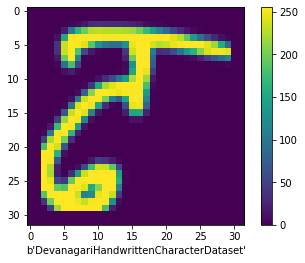

In [9]:
def charactername(dic,label):
    for key, value in dic.items():    # for name, age in list.items():  (for Python 3.x)
        if(value == label):
            return (key)
print("Y shape",Y.shape)
print("X shape",X.shape)
#To print a random image and it's label from trainig set
rand = np.random.randint(1,100)
plt.figure()
plt.imshow(x_train[rand])
plt.colorbar()
plt.gca().grid(False)
plt.xlabel(charactername(Yclass,y_train[rand]))

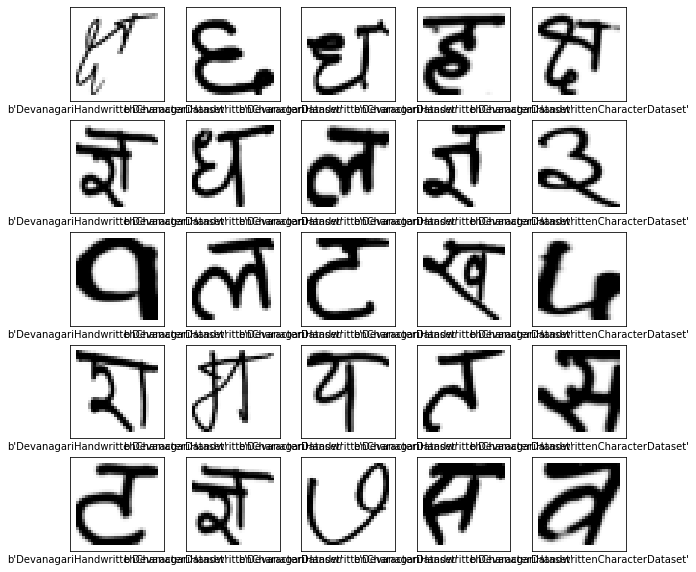

In [10]:
plt.figure(figsize=(10,10))
rand = np.random.randint(1,1000,25)
for i in range(len(rand)):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(x_train[rand[i]], cmap=plt.cm.binary)
    plt.xlabel(charactername(Yclass,y_train[rand[i]]))

In [11]:
x_train = (x_train-np.mean(x_train))/np.std(x_train)
x_test = (x_test-np.mean(x_test))/np.std(x_test)

In [25]:
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(46, activation=tf.nn.softmax)
])

model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(46, activation=tf.nn.softmax)
])


model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(46, activation=tf.nn.softmax)
])
modellist = {'model1':model1,'model2':model2,'model3':model3}

In [31]:
for k in modellist:
    modellist[k].compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
epo = {'model1':[],'model2':[],'model3':[]}
trainacc = {'model1':[],'model2':[],'model3':[]}
testacc = {'model1':[],'model2':[],'model3':[]}
def trainandaccuracy(epochs,model,i):
    print("--"*20)
    print(i,epochs)
    model.fit(x_train,y_train, epochs=epochs)
    test_loss, test_acc = model.evaluate(x_test,y_test)
    train_loss, train_acc = model.evaluate(x_train,y_train)
    epo[i].append(epochs)
    trainacc[i].append(train_acc)
    testacc[i].append(test_acc)

In [33]:
for i in modellist:
    trainandaccuracy(10,modellist[i],i)

----------------------------------------
model1 10
Epoch 1/10
54740/54740 [==============================] - 9s 158us/sample - loss: 0.0030 - acc: 0.9994
Epoch 2/10
54740/54740 [==============================] - 5s 90us/sample - loss: 2.2349e-07 - acc: 1.0000
Epoch 3/10
54740/54740 [==============================] - 5s 86us/sample - loss: 1.1334e-07 - acc: 1.0000
Epoch 4/10
54740/54740 [==============================] - 5s 83us/sample - loss: 5.8983e-08 - acc: 1.0000
Epoch 5/10
54740/54740 [==============================] - 5s 83us/sample - loss: 2.9394e-08 - acc: 1.0000
Epoch 6/10
54740/54740 [==============================] - 4s 75us/sample - loss: 1.3650e-08 - acc: 1.0000
Epoch 7/10
54740/54740 [==============================] - 5s 100us/sample - loss: 6.0737e-09 - acc: 1.0000
Epoch 8/10
54740/54740 [==============================] - 5s 84us/sample - loss: 2.7309e-09 - acc: 1.0000
Epoch 9/10
54740/54740 [==============================] - 6s 114us/sample - loss: 1.1455e-09 - acc: 1.0